| Field | Value |
|-|-|
| simulation file | stdp_figure_sjostrom.py |
| result files prefix | stdp_figure_sjostrom |
| # result files | 1\*1\*1\*1\*5\*2 = 10 |
| simulation start | 2015-04-10 15:49:52 |
| simulation end | 2015-04-10 15:54:43 |
| duration | 0:04:51 |
| repository | https://github.com/dspicher/py_stdp |
| revision hash | [d5af7ae87dd21350e1fd5f722ee1b372848110cc](https://github.com/dspicher/py_stdp/tree/d5af7ae87dd21350e1fd5f722ee1b372848110cc) |

### Results
<font color='grey'>n/a</font>

### Conclusion
<font color='grey'>n/a</font>

In [1]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get(alpha, beta, g_L, r_max, freq, delta):
    return cPickle.load(open('stdp_figure_sjostrom_alpha_{0}_beta_{1}_g_L_{2}_r_max_{3}_freq_{4}_delta_{5}.p'.format(alpha, beta, g_L, r_max, freq, delta),'rb'))


alpha_s = [-54.0]
beta_s = [0.1]
g_L_s = [0.03]
r_max_s = [0.071]
freq_s = array([  1.,  10.,  20.,  40.,  50.])
delta_s = array([-10.,  10.])


params = list(product(alpha_s, beta_s, g_L_s, r_max_s, freq_s, delta_s))

data = {tup:get(*tup) for tup in params}

(-1, 51)

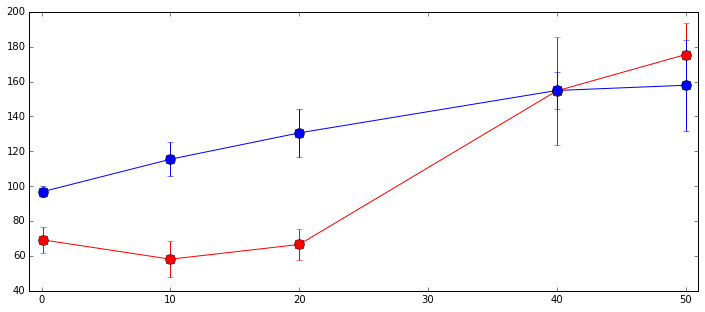

In [9]:
# experimental data

ltds = loadtxt('./experimental_data/sjo_ltd_freq_extracted.csv')
ltps = loadtxt('./experimental_data/sjo_ltp_freq_extracted.csv')
sjos_freqs = array([0.1, 10.0, 20.0, 40.0, 50.0])

sjos_ltds = zeros((sjos_freqs.shape[0],2))
for idx in range(sjos_ltds.shape[0]):
    sjos_ltds[idx,0] = ltds[idx*2]
    sjos_ltds[idx,1] = ltds[idx*2+1]-ltds[idx*2]

figure(figsize=(12,5))
errorbar(sjos_freqs,sjos_ltds[:,0],sjos_ltds[:,1],c='r',marker='o',markersize=10)

sjos_ltps = zeros((sjos_freqs.shape[0],2))
for idx in range(sjos_ltps.shape[0]):
    sjos_ltps[idx,0] = ltps[idx*2]
    sjos_ltps[idx,1] = ltps[idx*2+1]-ltps[idx*2]
errorbar(sjos_freqs,sjos_ltps[:,0],sjos_ltps[:,1],c='b',marker='o',markersize=10)
xlim([-1,51])

In [12]:
model_plasticity = zeros((freq_s.shape[0],delta_s.shape[0]))
for freq_idx, freq in enumerate(freq_s):
    p = (alpha_s[0], beta_s[0], g_L_s[0],r_max_s[0],freq,-10.)
    model_plasticity[freq_idx,0] = data[p]*100.0
    p = (alpha_s[0], beta_s[0], g_L_s[0],r_max_s[0],freq,10.)
    model_plasticity[freq_idx,1] = data[p]*100.0
print model_plasticity

[[ 106.36399984   50.88794827]
 [ 109.90688801   55.54385781]
 [ 115.9709096    75.0356853 ]
 [ 138.26340437  124.55084324]
 [ 148.40254784  146.58117294]]


In [13]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

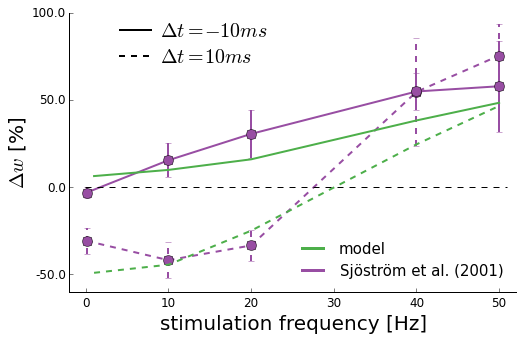

In [15]:
figure(figsize=(8,5))
plot([-20,-10],[0,0],'#4daf4a',lw=3)
plot([-20,-10],[0,0],'#984ea3',lw=3)

ltds = zeros((freqs.shape[0],2))
for idx in range(ltds.shape[0]):
    ltds[idx,0] = sjos_ltd[idx*2]
    ltds[idx,1] = sjos_ltd[idx*2+1]-sjos_ltd[idx*2]

eb1=errorbar(freqs,ltds[:,0],ltds[:,1],c='#984ea3',marker='o',markersize=10,ls='--',lw=2)
eb1[-1][0].set_linestyle('--')

ltps = zeros((freqs.shape[0],2))
for idx in range(ltps.shape[0]):
    ltps[idx,0] = sjos_ltp[idx*2]
    ltps[idx,1] = sjos_ltp[idx*2+1]-sjos_ltp[idx*2]
errorbar(freqs,ltps[:,0],ltps[:,1],c='#984ea3',marker='o',markersize=10,lw=2)


plot(freq_s,model_plasticity[:,0],c='#4daf4a',lw=2)
plot(freq_s,model_plasticity[:,1],'--',c='#4daf4a',lw=2)
plot([-0.1,51.0],[100.0,100.0],'k--')
hlines(190,4,8,lw=2)
hlines(175,4,8,linestyle='--',lw=2)
text(9,175,'$\Delta t=10ms$',horizontalalignment='left',verticalalignment='center',size=20)
text(9,190,'$\Delta t=-10ms$',horizontalalignment='left',verticalalignment='center',size=20)
legend(['model',u'Sjöström et al. (2001)'],loc=4,frameon=False,fontsize=15)
simpleaxis(gca())
xlabel('stimulation frequency [Hz]', fontsize=20)
ylabel('$\Delta w$ [%]',fontsize=20)
yt = yticks()[0]
yticks(yt,[str(a-100) for a in yt],fontsize=12)
xticks(xticks()[0],fontsize=12)
xlim([-2,52])
ylim([40,200])
savefig('stdp_figure_sjostrom.pdf')